In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
ecommerce = pd.read_csv("./Ecommerce_Sales_Prediction_Dataset.csv")
df = ecommerce.copy()
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [14]:
df.shape

(1000, 7)

## EDA

In [15]:
df.isnull().sum()

Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1000.0,505.24192,289.791248,14.59,243.3425,509.310,747.5925,999.42
Discount,1000.0,24.91975,14.439951,0.01,12.9950,24.965,37.5625,49.92
Marketing_Spend,1000.0,4912.83024,2840.602656,100.30,2413.0200,4837.245,7319.6750,9995.62
Units_Sold,1000.0,29.63100,7.267989,5.00,24.0000,30.000,34.0000,57.00


### Correlation Matrix

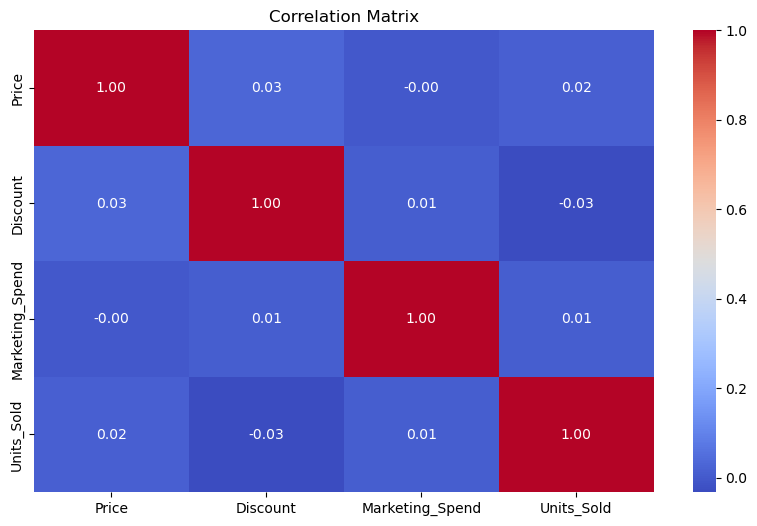

In [17]:
df_numerical = df.select_dtypes(include = ['Float64','int64'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Distribution of units sold by product categories

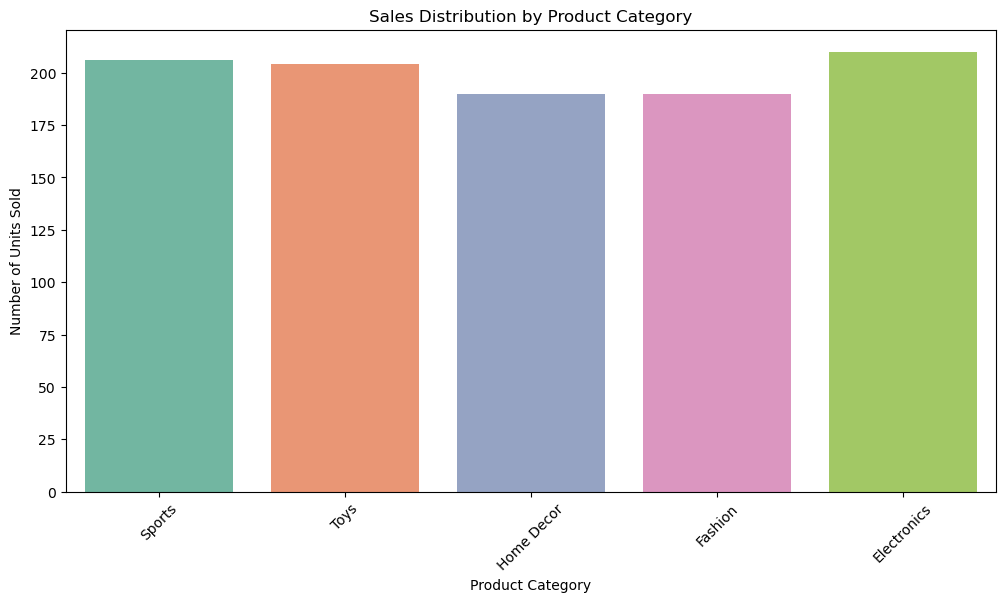

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category', palette='Set2')
plt.title('Sales Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=45)
plt.show()

### Price Distribution

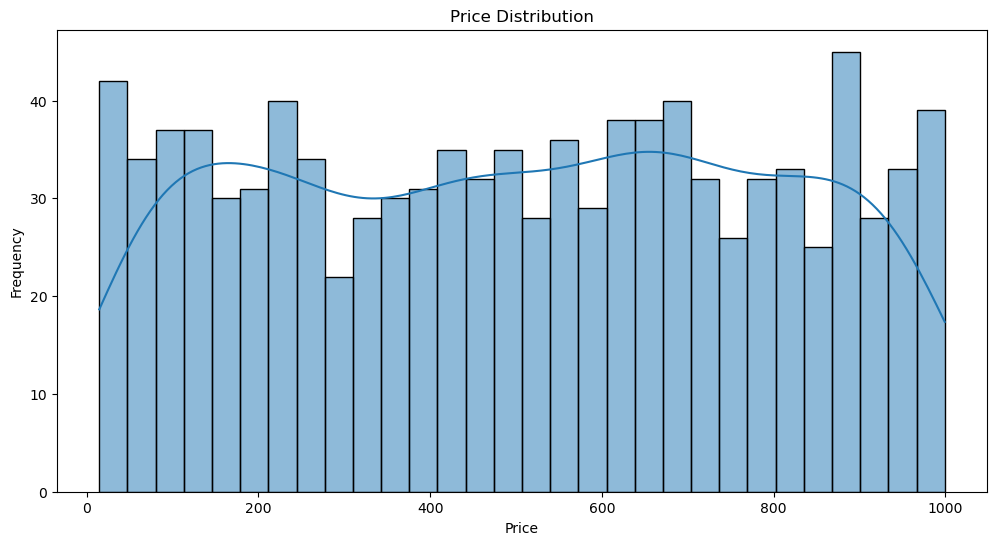

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Distribution of Discount Rates

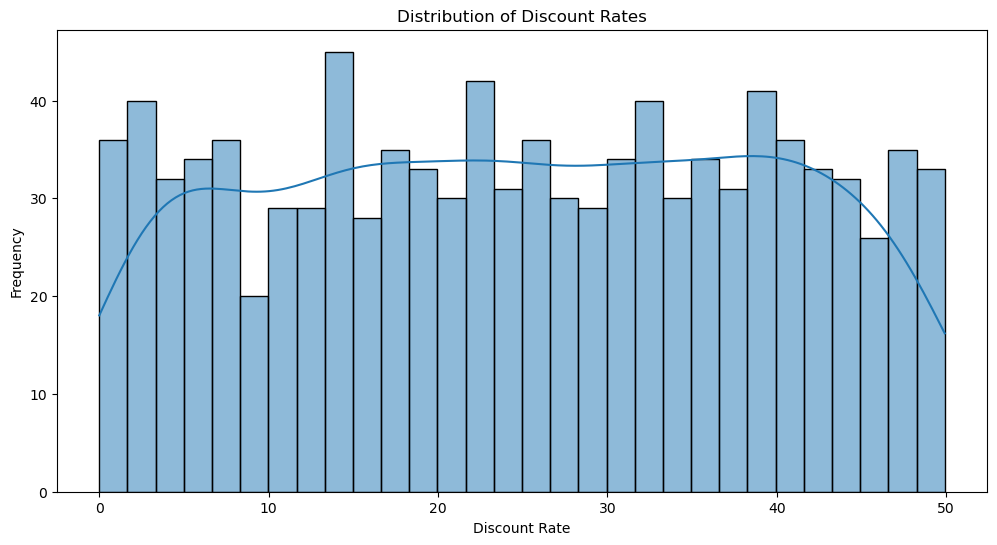

In [20]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Discount'], bins=30, kde=True, palette='Set2')
plt.title('Distribution of Discount Rates')
plt.xlabel('Discount Rate')
plt.ylabel('Frequency')
plt.show()

### Sales by Customer Segment

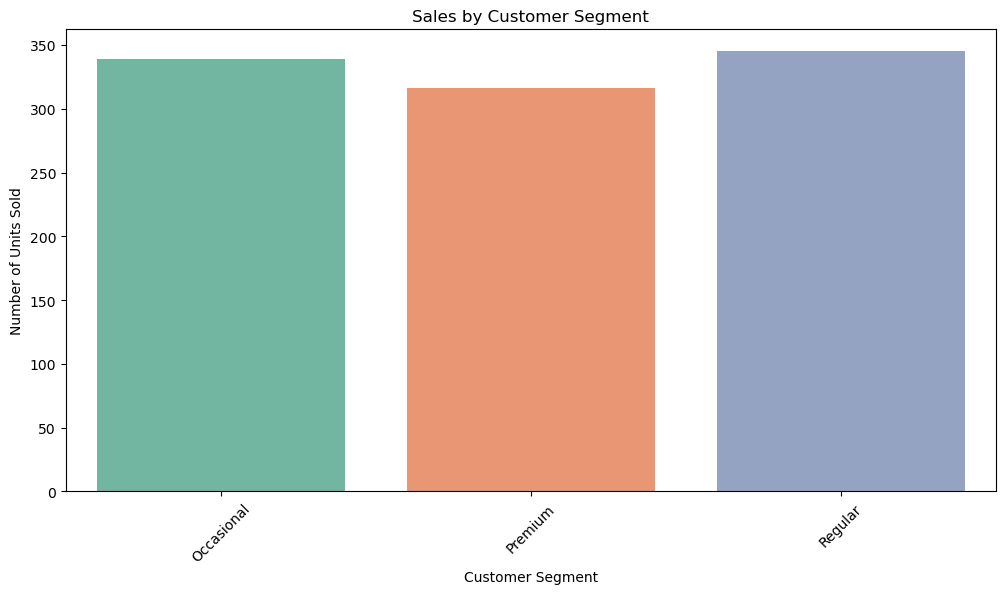

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Customer_Segment', palette='Set2')
plt.title('Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=45)
plt.show()

### Relationship Between Marketing Spend and Units Sold

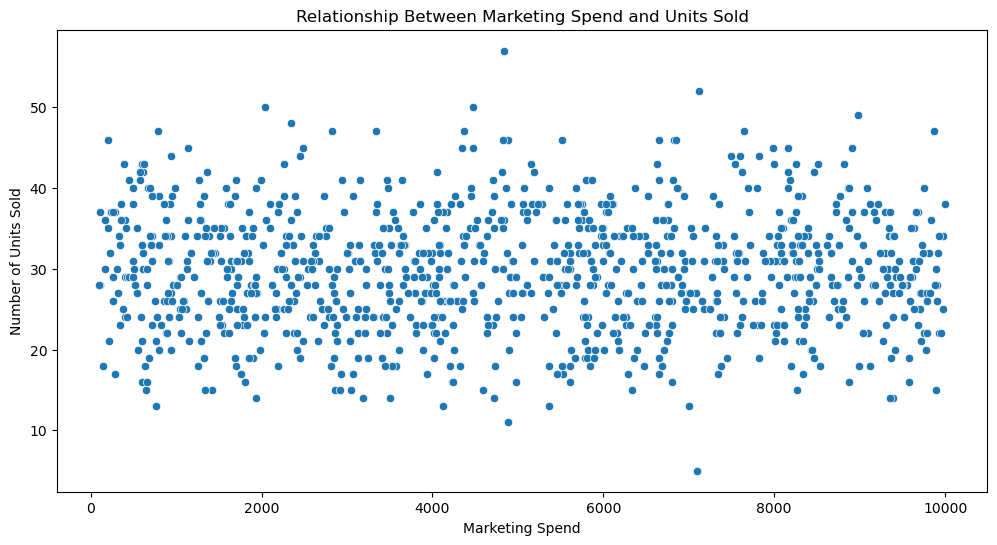

In [22]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Marketing_Spend', y='Units_Sold', palette='Set2')
plt.title('Relationship Between Marketing Spend and Units Sold')
plt.xlabel('Marketing Spend')
plt.ylabel('Number of Units Sold')
plt.show()

### Sales Trends Over Time

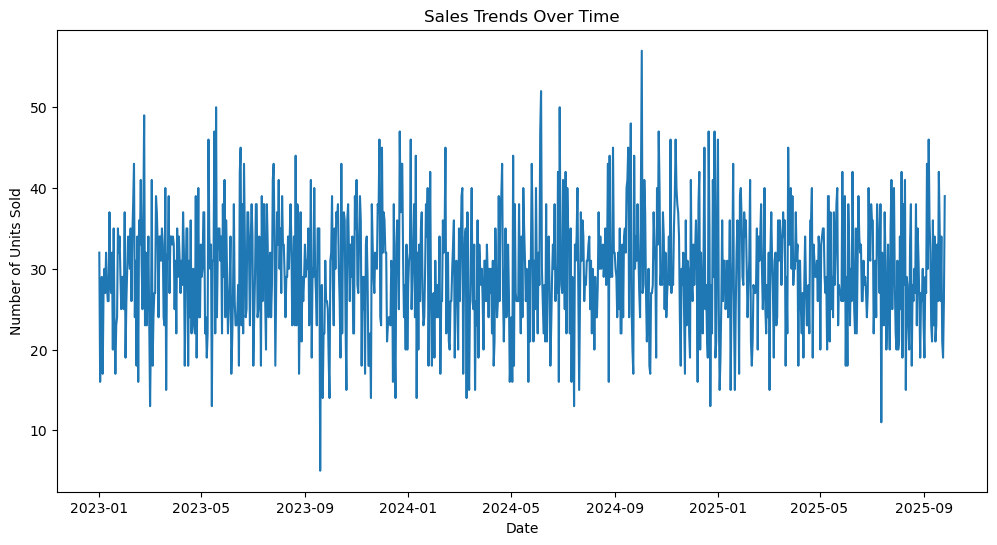

In [23]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Units_Sold')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Units Sold')
plt.show()

### Sales Distribution by Product Category and Customer Segment

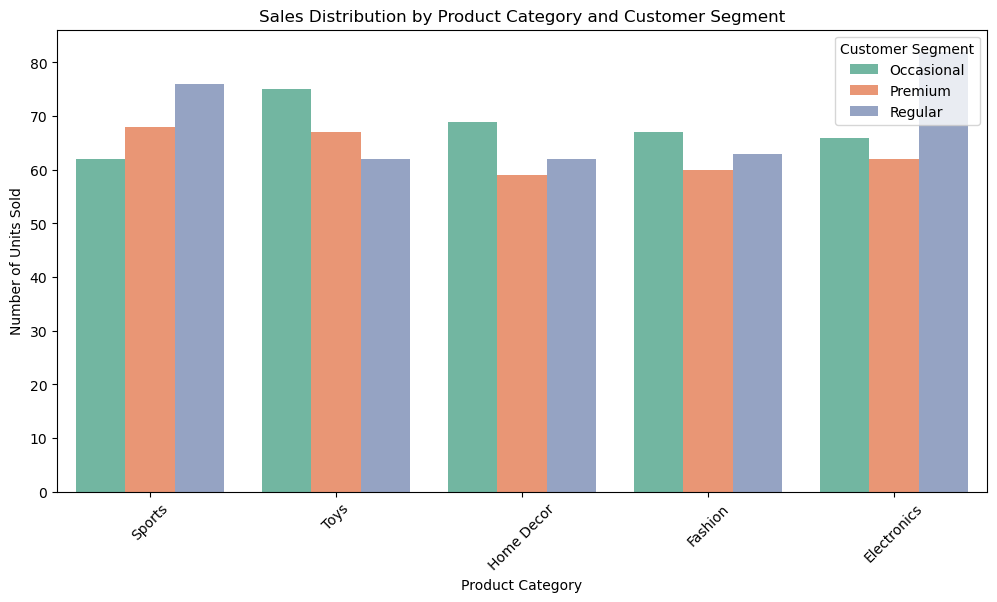

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Product_Category', hue='Customer_Segment', palette='Set2')
plt.title('Sales Distribution by Product Category and Customer Segment')
plt.xlabel('Product Category')
plt.ylabel('Number of Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.show()

### Boxplot of Price by Product Category

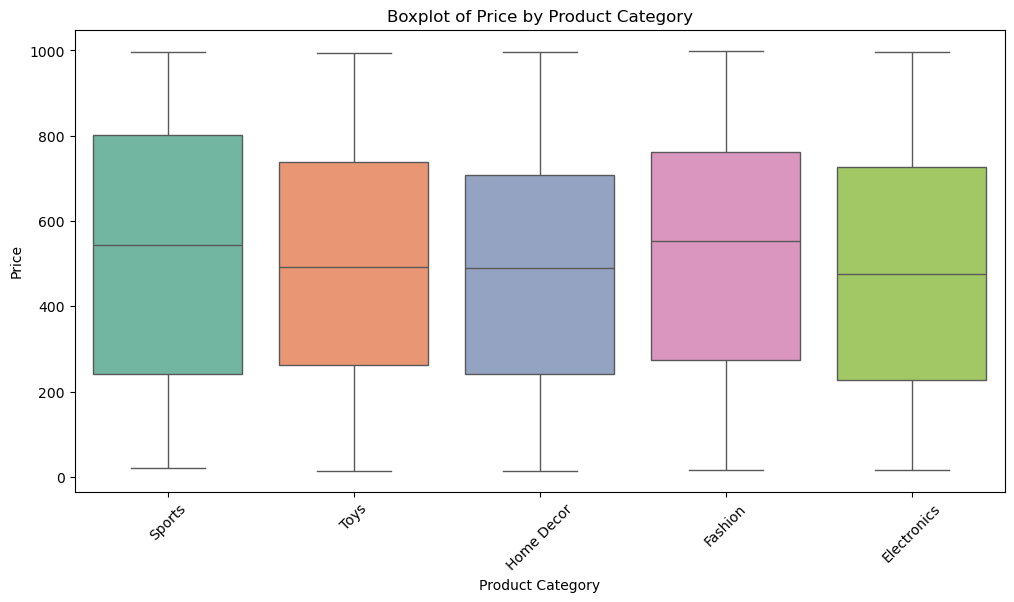

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Category', y='Price', palette='Set2')
plt.title('Boxplot of Price by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Pairplot of Numerical Features

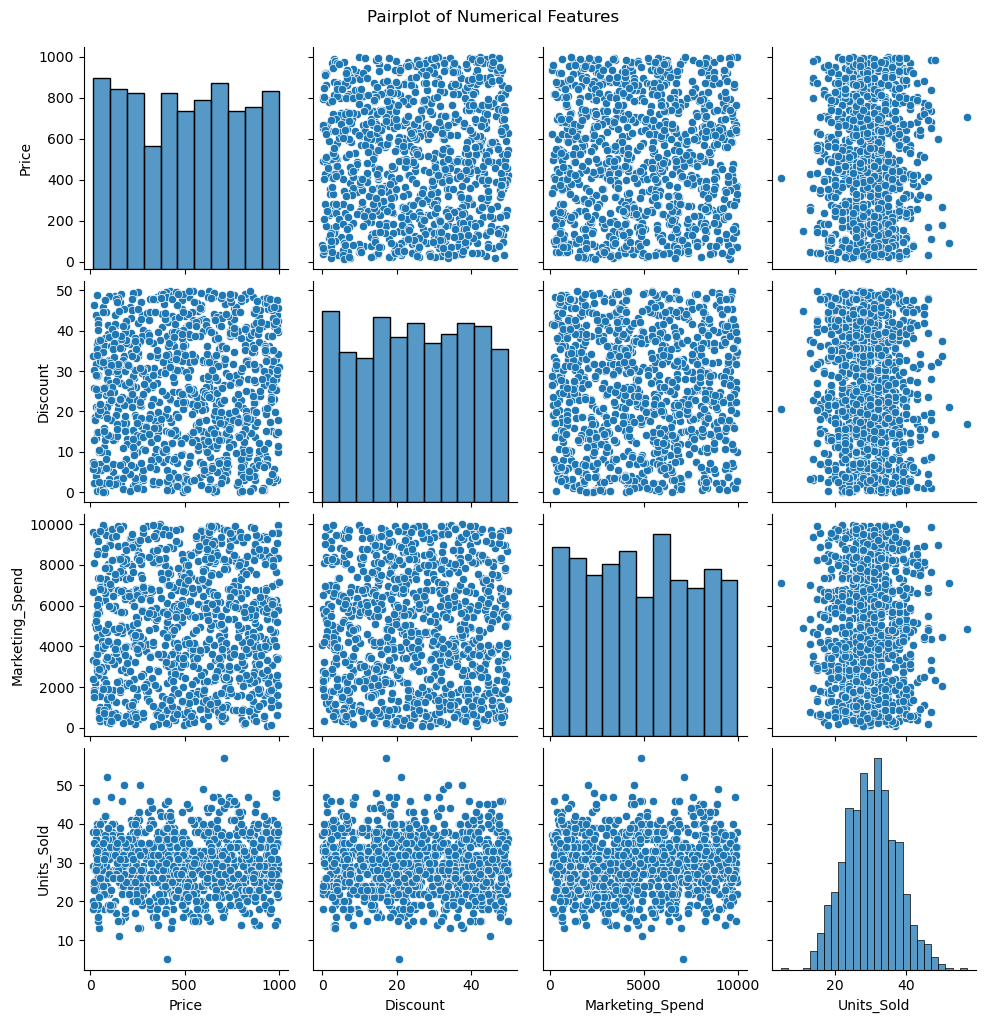

In [26]:
sns.pairplot(df, vars=['Price', 'Discount', 'Marketing_Spend', 'Units_Sold'])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

### Distribution of Marketing Spend by Customer Segment

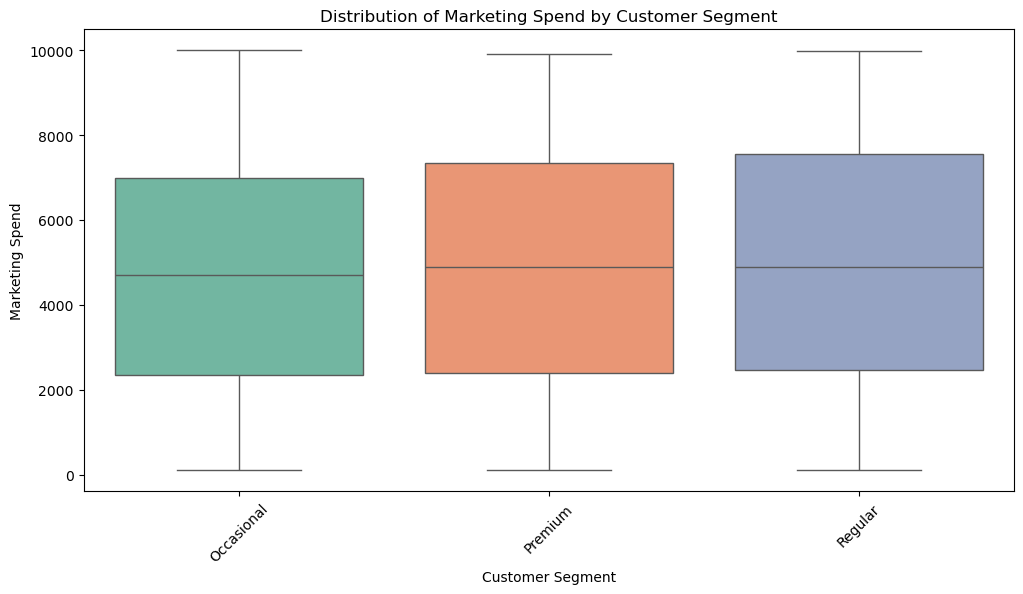

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Customer_Segment', y='Marketing_Spend', palette = 'Set2')
plt.title('Distribution of Marketing Spend by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Marketing Spend')
plt.xticks(rotation=45)
plt.show()

### Units Sold Over Time by Product Category

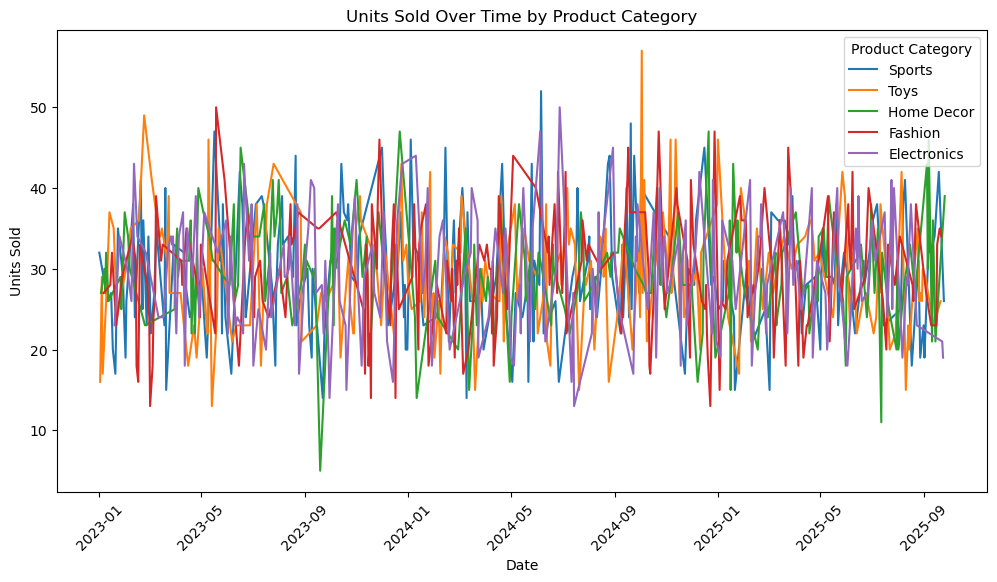

In [28]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Units_Sold', hue='Product_Category')
plt.title('Units Sold Over Time by Product Category')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

### Discount Distribution by Product Category

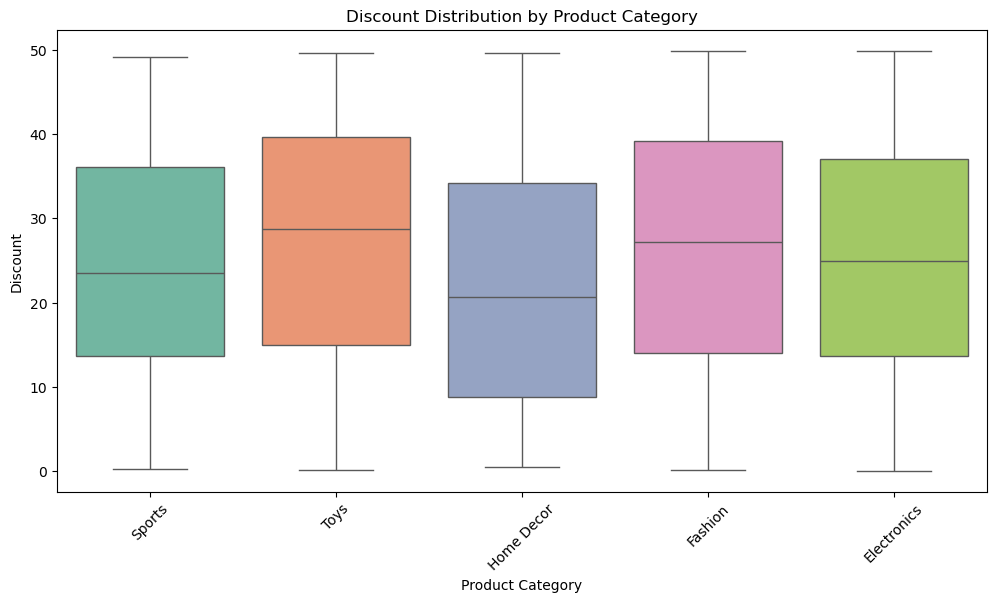

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product_Category', y='Discount',palette = 'Set2')
plt.title('Discount Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Discount')
plt.xticks(rotation=45)
plt.show()

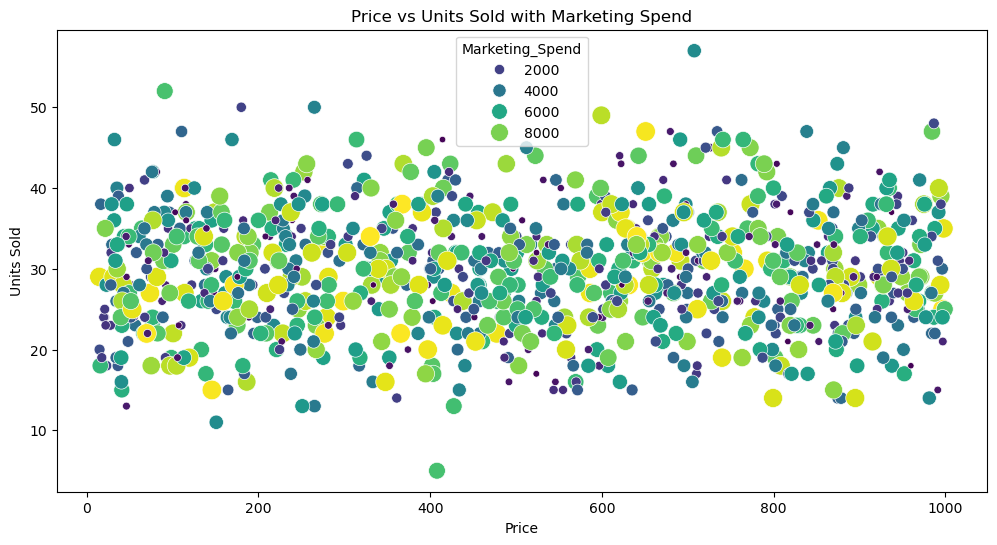

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Price', y='Units_Sold', hue='Marketing_Spend', palette='viridis', size='Marketing_Spend', sizes=(20, 200))
plt.title('Price vs Units Sold with Marketing Spend')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.show()


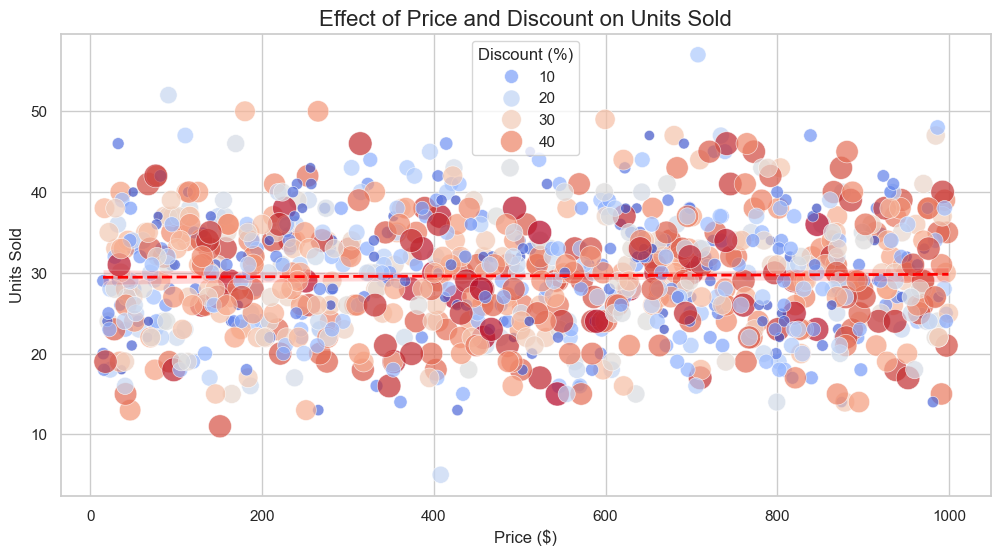

In [56]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Price', y='Units_Sold', hue='Discount', palette='coolwarm', size='Discount', sizes=(50, 300), alpha=0.7, edgecolor="w", linewidth=0.5)
sns.regplot(data=df, x='Price', y='Units_Sold', scatter=False, color='red', line_kws={"color": "red", "lw": 2, "ls": "--"})
plt.title('Effect of Price and Discount on Units Sold', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(title='Discount (%)')

plt.show()

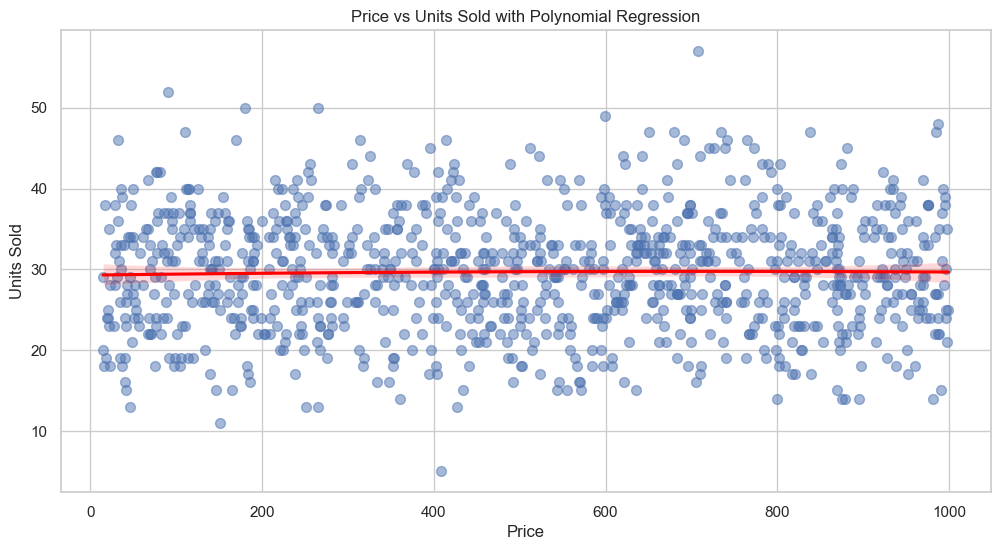

In [57]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Price', y='Units_Sold', data=df, order=2, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Price vs Units Sold with Polynomial Regression')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.show()

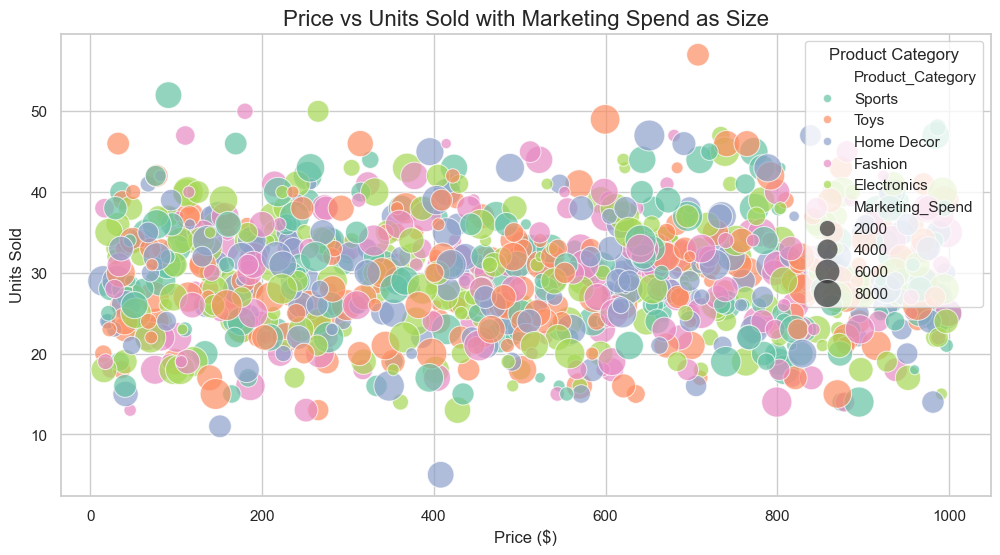

In [60]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Price', y='Units_Sold', size='Marketing_Spend', sizes=(50, 500), alpha=0.7, hue='Product_Category', palette='Set2', edgecolor='w')
plt.title('Price vs Units Sold with Marketing Spend as Size', fontsize=16)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(title='Product Category')
plt.show()

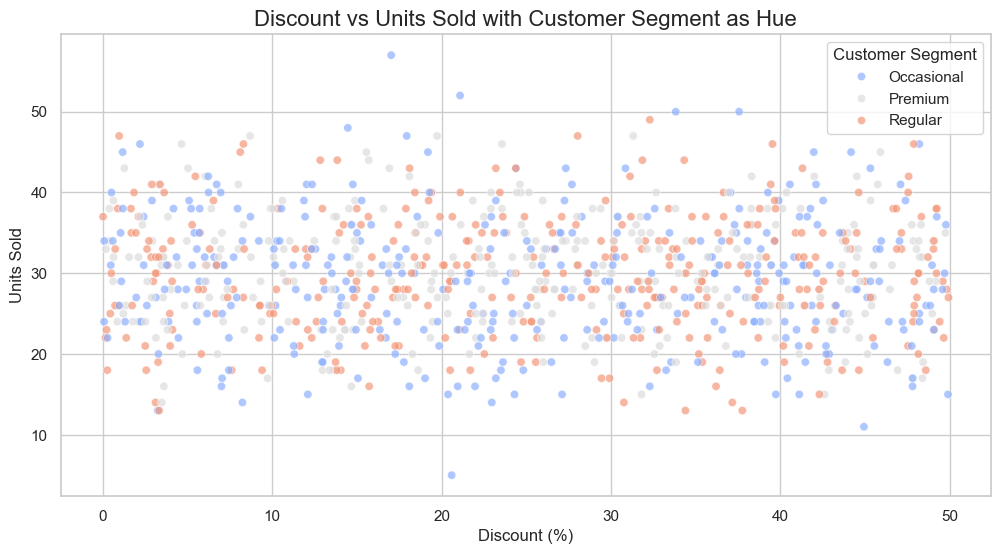

In [62]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Discount', y='Units_Sold', hue='Customer_Segment', palette='coolwarm', alpha=0.7, edgecolor='w')
plt.title('Discount vs Units Sold with Customer Segment as Hue', fontsize=16)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.legend(title='Customer Segment')
plt.show()


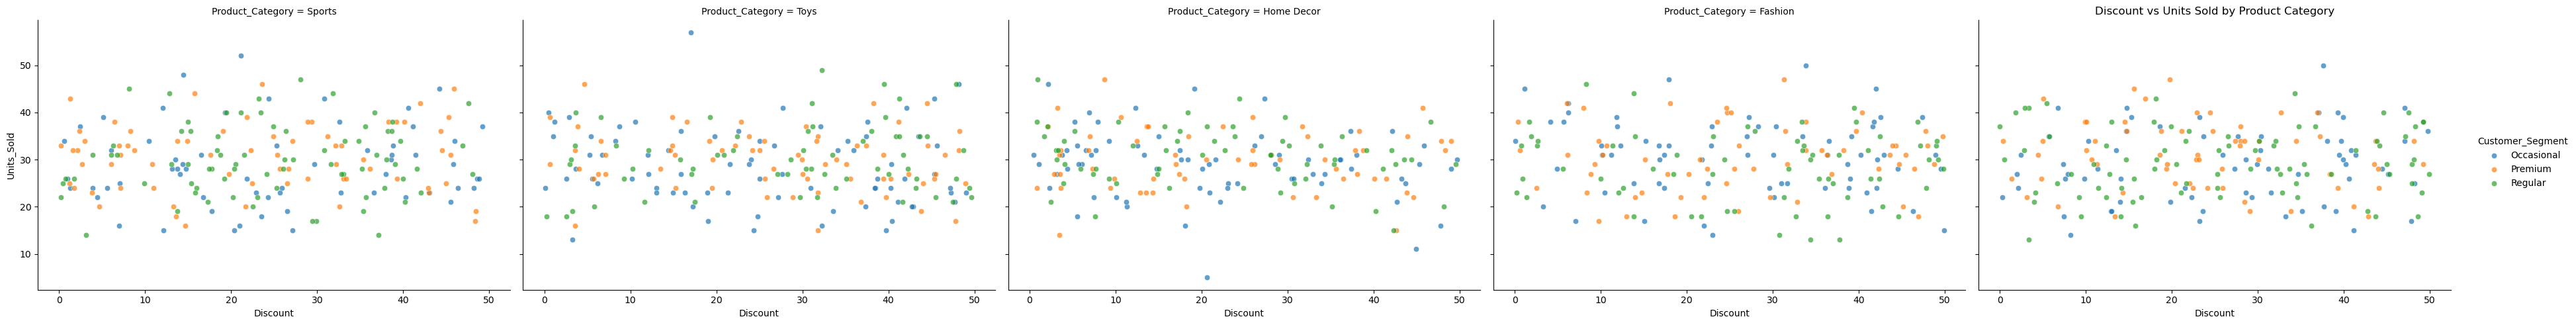

In [38]:
g = sns.FacetGrid(df, col="Product_Category", hue="Customer_Segment", height=5, aspect=1.5)
g.map(sns.scatterplot, "Discount", "Units_Sold", alpha=0.7)
g.add_legend()
plt.title('Discount vs Units Sold by Product Category')
plt.show()

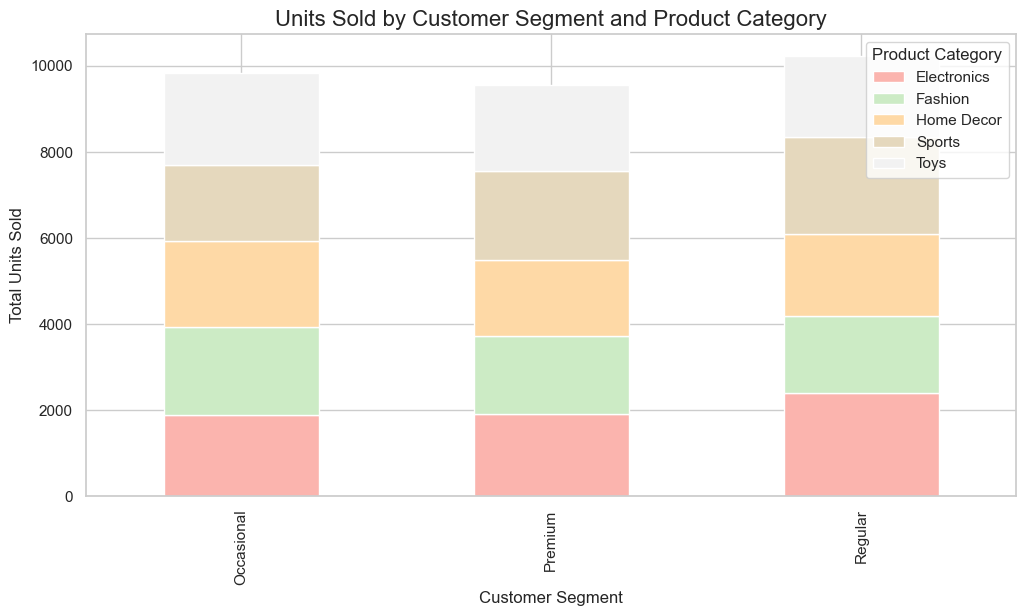

In [66]:
sales_by_segment_category = df.groupby(['Customer_Segment', 'Product_Category'])['Units_Sold'].sum().unstack()
sales_by_segment_category.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='Pastel1')
plt.title('Units Sold by Customer Segment and Product Category', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.legend(title='Product Category')
plt.show()

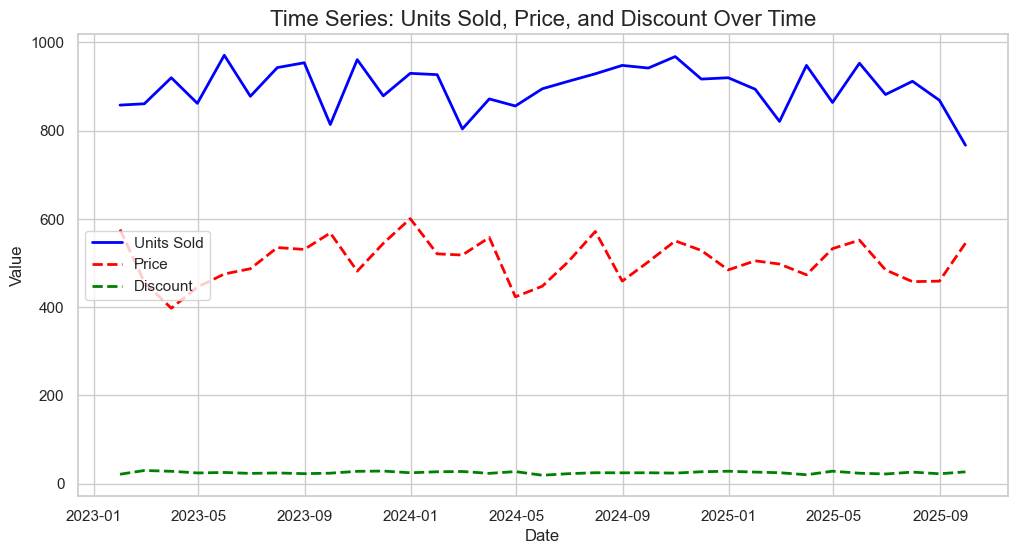

In [67]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Resample by month and calculate total units sold, average price, and average discount
df_monthly = df.resample('M', on='Date').agg({'Units_Sold': 'sum', 'Price': 'mean', 'Discount': 'mean'})

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_monthly, x=df_monthly.index, y='Units_Sold', label='Units Sold', color='blue', lw=2)
sns.lineplot(data=df_monthly, x=df_monthly.index, y='Price', label='Price', color='red', lw=2, linestyle='--')
sns.lineplot(data=df_monthly, x=df_monthly.index, y='Discount', label='Discount', color='green', lw=2, linestyle='--')
plt.title('Time Series: Units Sold, Price, and Discount Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend()
plt.show()


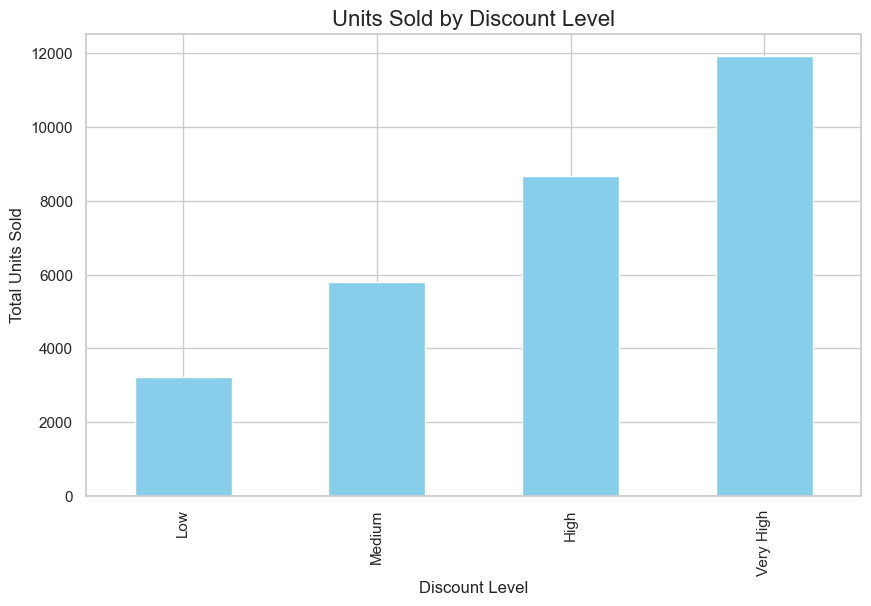

In [70]:
df['Discount_Binned'] = pd.cut(df['Discount'], bins=[0, 5, 15, 30, 50], labels=['Low', 'Medium', 'High', 'Very High'])
sales_by_discount = df.groupby('Discount_Binned')['Units_Sold'].sum()
sales_by_discount.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Units Sold by Discount Level', fontsize=16)
plt.xlabel('Discount Level', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.show()



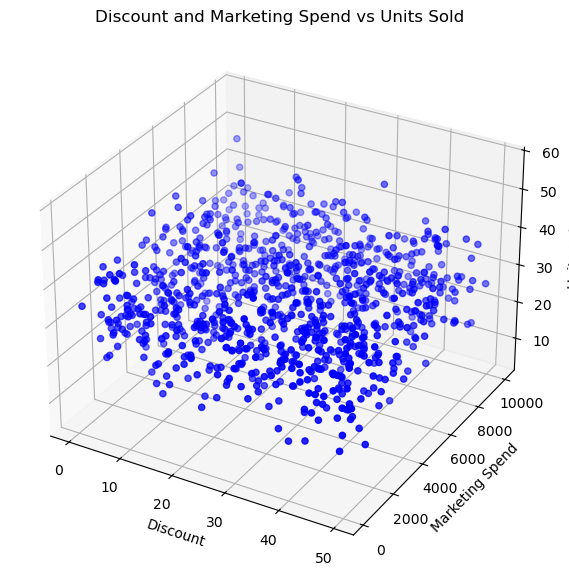

In [39]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Discount'], df['Marketing_Spend'], df['Units_Sold'], c='blue', marker='o')
ax.set_xlabel('Discount')
ax.set_ylabel('Marketing Spend')
ax.set_zlabel('Units Sold')
plt.title('Discount and Marketing Spend vs Units Sold')
plt.show()


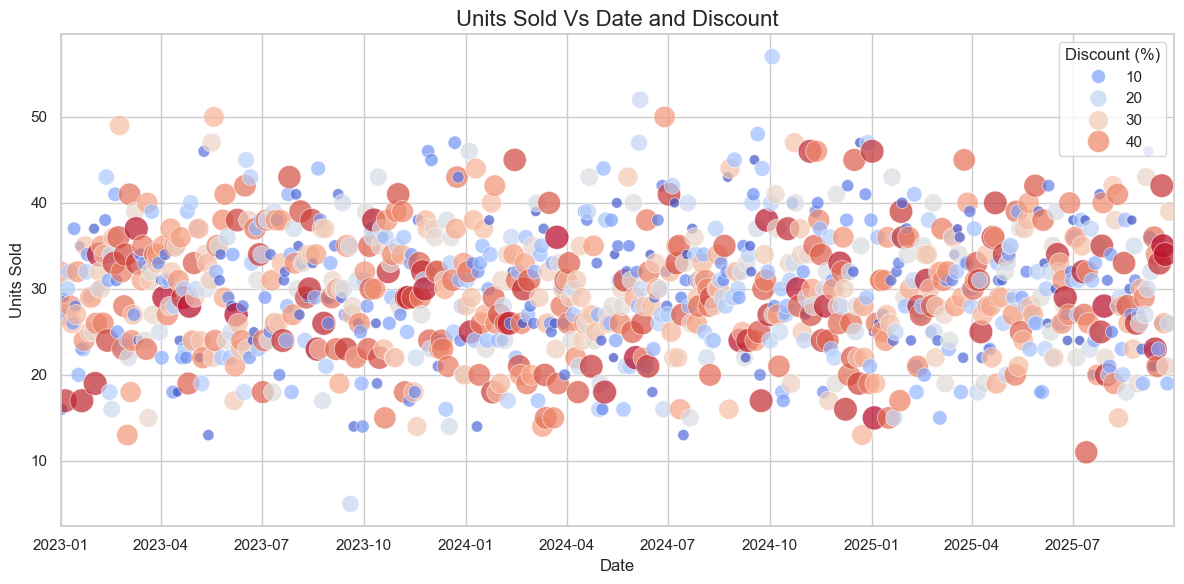

In [88]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
start_date = pd.to_datetime("2023-01-01")
end_date = pd.to_datetime("2025-09-30")
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
df_filtered['Date_numeric'] = (df_filtered['Date'] - df_filtered['Date'].min()).dt.days
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='Date', y='Units_Sold', hue='Discount', palette='coolwarm', 
                size='Discount', sizes=(50, 300), alpha=0.7, edgecolor="w", linewidth=0.5)

sns.regplot(data=df_filtered, x='Date_numeric', y='Units_Sold', scatter=False, color='red', 
            line_kws={"color": "red", "lw": 2, "ls": "--"})

plt.title('Units Sold Vs Date and Discount', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)

plt.xticks(rotation=0)
plt.xlim(start_date, end_date)
plt.legend(title='Discount (%)')
plt.tight_layout()
plt.show()
